In [203]:
diagnosis = pd.read_csv('./B4_의료/01 Patient_Diagnosis_Data.csv')
surgery = pd.read_csv('./B4_의료/02 Patient_Surgery_Data.csv')
image = pd.read_csv('./B4_의료/03 Medical_Image_Data.csv', encoding = 'euc-kr')

### diagnosis.csv

In [151]:
# ODI 0 채우기
diagnosis.ODI.fillna(0, inplace=True)
diagnosis.ODI.isnull().sum()

0

In [152]:
# 가족력 drop
diagnosis.shape
diagnosis.dropna(subset=['가족력'],inplace = True)
diagnosis.shape

(1843, 30)

In [153]:
# 헤모글로빈수치
diagnosis.dropna(subset=['헤모글로빈수치'],inplace = True)
diagnosis.shape

(1842, 30)

In [154]:
# 통증기간
diagnosis['통증기간(월)'].fillna(diagnosis['통증기간(월)'].mean(skipna= True), inplace = True)
diagnosis['통증기간(월)'].isnull().sum()

0

### surgery_data.csv

In [155]:
surgery.shape

(1894, 15)

In [156]:
# 수슬기법 

In [157]:
# 수술시간

In [158]:
# 헤모글로빈수치
surgery.drop('헤모글로빈수치', axis = 1, inplace = True)
surgery.shape

(1894, 14)

In [159]:
# 환자통증정도
surgery.drop('환자통증정도', axis = 1 , inplace = True)
surgery.shape

(1894, 13)

In [160]:
# 혈액형
surgery.drop('혈액형', axis = 1 , inplace = True)
surgery.shape

(1894, 12)

In [161]:
surgery.columns

Index(['환자ID', '수술기법', '수술시간', '수술실패여부', '신장', '연령', '재발여부', '체중', '통증기간(월)',
       '입원일자', '퇴원일자', '수술일자'],
      dtype='object')

In [204]:
surgery.drop(['신장', '연령', '입원일자', '퇴원일자', '통증기간(월)'], inplace = True, axis = 1)

In [163]:
surgery

,환자ID,수술기법,수술시간,수술실패여부,재발여부,체중,수술일자
0,1052PT,TELD,30.0,0,0,75.0,2011-03-28
1,1056PT,TELD,70.0,0,0,70.0,2011-04-04
2,1093PT,TELD,45.0,0,0,68.0,2011-05-09
3,1687PT,IELD,80.0,0,0,70.0,2013-02-11
4,1674PT,TELD,130.0,0,0,77.0,2013-03-18
...,...,...,...,...,...,...,...
1889,550PT,TELD,46.0,1,0,56.7,2021-01-02
1890,739PT,TELD,65.0,0,1,61.0,2021-01-02
1891,890PT,TELD,76.0,0,0,55.0,2021-01-02
1892,891PT,TELD,77.0,0,0,56.0,2021-01-02


### Medical_image_data.csv

In [164]:
image.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [165]:
# 지방축적도

In [166]:
# PI
image.dropna(subset=['PI'],inplace = True)
image['PI'].isnull().sum()

0

In [167]:
# PT
image.dropna(subset=['PT'],inplace = True)
image['PT'].isnull().sum()

0

In [168]:
# 골밀도

In [169]:
# 디스크단면적
image['디스크단면적'].isnull().sum()
image.dropna(subset=['디스크단면적'],inplace = True)

In [170]:
# 디스크위치

## merge

In [205]:
df = pd.merge(diagnosis, surgery, on = '환자ID')

In [206]:
merge_df = pd.merge(df, image, on = '환자ID')

In [207]:
merge_df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중_x', '헤모글로빈수치_x', '혈전합병증여부', '환자통증정도_x', '흡연여부',
       '통증기간(월)', '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부', '재발여부', '체중_y',
       '헤모글로빈수치_y', '환자통증정도_y', '혈액형', '수술일자', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증'],
      dtype='object')

In [208]:
merge_df.drop('체중_y', axis =1 , inplace = True)

In [209]:
merge_df.rename(columns  = {'체중_x' : '체중'}, inplace = True)

In [210]:
merge_df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '헤모글로빈수치_x', '혈전합병증여부', '환자통증정도_x', '흡연여부',
       '통증기간(월)', '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부', '재발여부',
       '헤모글로빈수치_y', '환자통증정도_y', '혈액형', '수술일자', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증'],
      dtype='object')

In [211]:
merge_df.drop('헤모글로빈수치_x', axis =1 , inplace = True)
merge_df.drop('환자통증정도_x', axis =1 , inplace = True)
merge_df.drop('환자통증정도_x', axis =1 , inplace = True)


merge_df.rename(columns  = {'헤모글로빈수치_y' : '헤모글로빈수치'}, inplace = True)
merge_df.rename(columns  = {'환자통증정도_y' : '환자통증정도'}, inplace = True)



In [212]:
merge_df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [213]:
merge_df.to_csv('merge_df.csv', index = False)

### merge_df 불러오기

In [280]:
df = pd.read_csv('./merge_df.csv')

In [281]:
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,49.7,27.6,1.2,0,NaN,2155.3,4,Middle,0
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,36.3,4.5,7.3,0,NaN,2143.1,4,Middle,0
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,41.3,17.4,13.4,0,NaN,1868.7,4,Down,0
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,45.7,16.6,20.1,0,NaN,1851.2,5,Middle,0
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,54.5,16.7,2.9,0,NaN,2419.1,2,Up,0


In [226]:
df.shape

(1894, 51)

In [227]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [182]:
df.직업.fillna('기타', inplace = True)
df.직업.isnull().sum()

0

In [183]:
# df_null = df.select_dtypes(['int','float']).corr()

In [184]:
# df_null.to_csv('./corr.csv')

In [185]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)',
       '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부', '재발여부', '수술일자', '전방디스크높이(mm)',
       '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI',
       'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치',
       '척추이동척도', '척추전방위증'],
      dtype='object')

In [186]:
df.dropna(subset = '지방축적도', inplace = True)
df['지방축적도'].isnull().sum()
df.shape

(1834, 50)

,수술시간
count,609.000000
mean,63.004926
std,26.106846
min,6.000000
25%,45.000000
50%,60.000000
75%,80.000000
max,220.000000


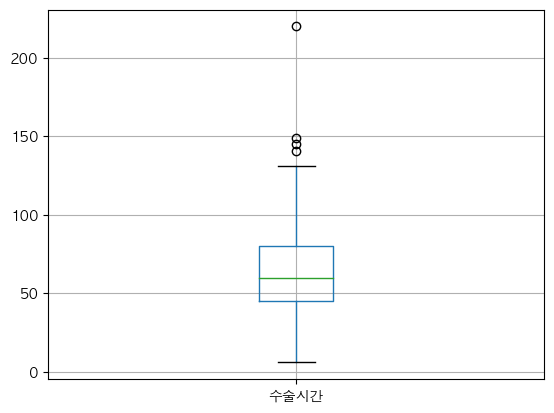

In [187]:
df[(df['연령'] >= 40) & (df['연령'] <= 50)][['수술시간']].boxplot()
df[(df['연령'] >= 40) & (df['연령'] <= 50)][['수술시간']].describe()

In [188]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)',
       '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부', '재발여부', '수술일자', '전방디스크높이(mm)',
       '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI',
       'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치',
       '척추이동척도', '척추전방위증'],
      dtype='object')

In [189]:
df['수술기법'].value_counts()

수술기법
TELD    1618
IELD     135
Name: count, dtype: int64

In [190]:
df[(df['수술기법'] == 'IELD') & (df['수술시간'] <= 200)][['수술시간']].describe()

,수술시간
count,134.000000
mean,70.156716
std,26.137247
min,19.000000
25%,51.000000
50%,69.500000
75%,85.000000
max,150.000000


In [191]:
df[(df['수술기법'] == 'TELD') & (df['수술시간'] <= 200) & (df['수술시간'] >= 10)][['수술시간']].describe()

,수술시간
count,1609.000000
mean,61.584214
std,24.336683
min,10.000000
25%,44.000000
50%,60.000000
75%,76.000000
max,190.000000


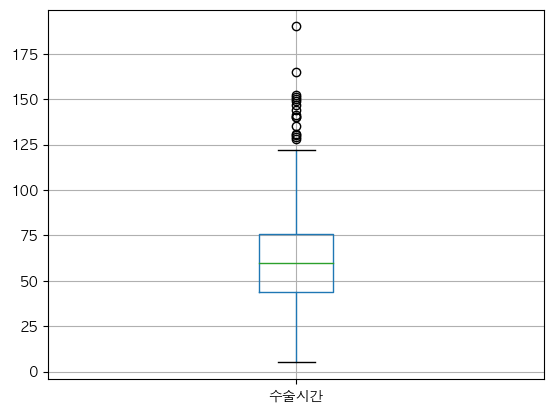

In [192]:
df[df['수술기법'] == 'TELD'][['수술시간']].boxplot();

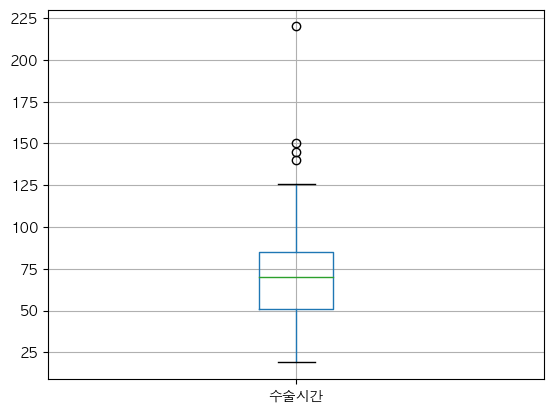

In [193]:
df[df['수술기법'] == 'IELD'][['수술시간']].boxplot();

In [194]:
image[image['골밀도']]

KeyError: "None of [Index([-1.01, -1.14, -1.77, -1.58, -0.79, -0.95, -1.71, -1.04, -1.33, -2.51,\n       ...\n         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],\n      dtype='float64', length=1889)] are in the [columns]"

In [195]:
image.columns=

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [196]:
image[image[['전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc','디스크단면적', '디스크위치', '척추이동척도', '척추전방위증']].duplicated()].sort_values('전방디스크높이(mm)').head(60)

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
718,719PT,1.27,5.30,172.62,0,2370.34,3,31.0,4.9,8.2,0,-1.18,1694.62,4,Middle,0
912,913PT,1.50,6.70,347.00,0,2283.00,0,56.9,24.3,16.7,0,-1.17,1933.00,4,Middle,0
1831,1832PT,1.50,6.70,347.00,0,2283.00,0,56.9,24.3,16.7,0,NaN,1933.00,4,Middle,0
1546,1547PT,3.90,3.40,181.40,0,2258.00,2,39.6,6.6,24.4,0,NaN,1479.00,4,Middle,0
764,765PT,3.90,3.40,181.40,0,2258.00,2,39.6,6.6,24.4,0,-2.04,1479.00,4,Middle,0
751,752PT,4.00,1.00,261.00,0,3246.00,1,60.4,19.7,33.5,0,-1.40,1666.00,4,Middle,0
747,748PT,4.20,4.90,272.20,0,1907.00,0,49.9,13.4,18.3,0,-1.27,1615.00,3,Middle,0
909,910PT,4.70,1.00,196.00,0,1691.00,0,29.8,11.1,8.2,0,-1.17,2217.00,4,Middle,0
1825,1826PT,4.70,1.00,196.00,0,1691.00,0,29.8,11.1,8.2,0,NaN,2217.00,4,Middle,0
1743,1744PT,4.72,7.06,315.50,0,1893.36,0,48.4,20.5,19.5,0,NaN,2023.83,4,Middle,0


In [197]:
image['골밀도'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1889     True
1890     True
1891     True
1892     True
1893     True
Name: 골밀도, Length: 1889, dtype: bool

In [198]:
df.to_csv('./merge_df.csv',index = False)

In [267]:
df = pd.read_csv('./merge_df.csv')

In [268]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [269]:
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,49.7,27.6,1.2,0,NaN,2155.3,4,Middle,0
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,36.3,4.5,7.3,0,NaN,2143.1,4,Middle,0
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,41.3,17.4,13.4,0,NaN,1868.7,4,Down,0
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,45.7,16.6,20.1,0,NaN,1851.2,5,Middle,0
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,54.5,16.7,2.9,0,NaN,2419.1,2,Up,0


In [276]:
image.info()
image.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   환자ID            1894 non-null   object 
 1   전방디스크높이(mm)     1894 non-null   float64
 2   후방디스크높이(mm)     1894 non-null   float64
 3   지방축적도           1891 non-null   float64
 4   Instability     1894 non-null   int64  
 5   MF + ES         1894 non-null   float64
 6   Modic change    1894 non-null   int64  
 7   PI              1890 non-null   float64
 8   PT              1890 non-null   float64
 9   Seg Angle(raw)  1893 non-null   float64
 10  Vaccum disc     1894 non-null   int64  
 11  골밀도             998 non-null    float64
 12  디스크단면적          1893 non-null   float64
 13  디스크위치           1894 non-null   int64  
 14  척추이동척도          1894 non-null   object 
 15  척추전방위증          1894 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 236.9+ KB


In [277]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1862
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   환자ID            993 non-null    object 
 1   전방디스크높이(mm)     993 non-null    float64
 2   후방디스크높이(mm)     993 non-null    float64
 3   지방축적도           993 non-null    float64
 4   Instability     993 non-null    int64  
 5   MF + ES         993 non-null    float64
 6   Modic change    993 non-null    int64  
 7   PI              993 non-null    float64
 8   PT              993 non-null    float64
 9   Seg Angle(raw)  993 non-null    float64
 10  Vaccum disc     993 non-null    int64  
 11  골밀도             993 non-null    float64
 12  디스크단면적          993 non-null    float64
 13  디스크위치           993 non-null    int64  
 14  척추이동척도          993 non-null    object 
 15  척추전방위증          993 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 131.9+ KB


In [215]:
import statsmodels.api as sm

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 15 to 1889
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    162 non-null    object 
 1   Large Lymphocyte        162 non-null    float64
 2   Location of herniation  162 non-null    int64  
 3   ODI                     162 non-null    float64
 4   가족력                     162 non-null    float64
 5   간질성폐질환                  162 non-null    int64  
 6   고혈압여부                   162 non-null    int64  
 7   과거수술횟수                  162 non-null    int64  
 8   당뇨여부                    162 non-null    int64  
 9   말초동맥질환여부                162 non-null    int64  
 10  빈혈여부                    162 non-null    int64  
 11  성별                      162 non-null    int64  
 12  스테로이드치료                 162 non-null    int64  
 13  신부전여부                   162 non-null    int64  
 14  신장                      162 non-null    int64

In [264]:
df.dropna(inplace = True)

In [266]:
df

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,intercept
15,975PT,49.4,3,26.0,0.0,0,0,1,0,0,...,41.7,11.3,28.7,0,-1.60,1761.5,4,Middle,0,1
18,521PT,31.5,4,14.0,0.0,0,0,0,0,0,...,44.1,20.5,4.7,0,-1.66,1899.3,4,Middle,0,1
27,546PT,42.8,3,49.0,0.0,0,0,0,0,0,...,44.6,11.6,9.5,0,-1.68,1683.5,4,Middle,0,1
40,539PT,42.6,2,44.0,0.0,0,0,0,0,0,...,58.6,25.6,21.7,0,-1.00,1348.7,4,Middle,0,1
42,12PT,53.2,3,39.0,0.0,0,0,0,0,0,...,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,149PT,26.7,2,35.0,0.0,0,0,0,0,0,...,45.3,15.1,7.7,0,-1.19,2235.8,4,Middle,0,1
1854,822PT,43.9,1,11.0,0.0,0,0,0,0,0,...,42.3,9.4,26.2,0,-1.71,1875.6,4,Middle,0,1
1879,117PT,49.6,3,30.0,0.0,0,0,0,0,0,...,39.8,3.8,16.8,0,-2.51,2142.7,4,Down,0,1
1887,136PT,36.1,3,42.0,0.0,0,0,1,0,0,...,48.1,10.9,10.1,0,-0.67,2375.6,4,Middle,0,1


In [ ]:
def age(x):
    if x <= 18:
        result = '청소년'
    elif x <= 